In [22]:
# STEP 1: IMPORT THE PACKAGES

#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [23]:
# STEP 2: LOAD DATA “train_final.csv” WHILE ASSIGNING -1 AS NULL VALUES

train = pd.read_csv('/Users/sanket/Downloads/train_final.csv',na_values=-1)
train = train.drop(['id'], axis=1)
print('train.csv number of rows and columns:',train.shape)

train.csv number of rows and columns: (43388, 30)


The target variable is "target", which is 1 if a claim was filed, and 0 otherwise. Also, the variables ending with "cat" are categorical, and those ending with "bin" are binary as per Kaggle website.

In [24]:
# STEP 3: SEPARATE TARGET AND FEATUES VARIABLES

features = train.drop(['target'], axis=1).values
targets = train.target.values

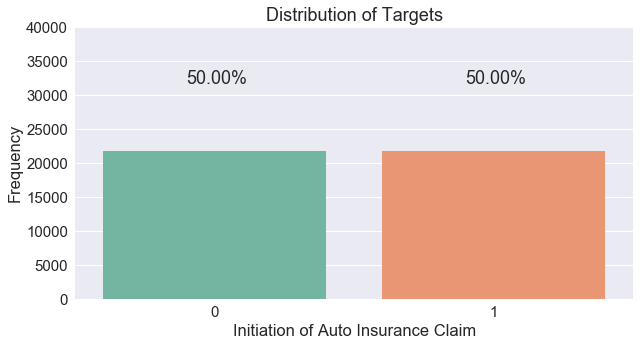

1    21694
0    21694
Name: target, dtype: int64

In [25]:
# STEP 4: EXPLORE “target” VARIABLE

targets = train.target.values
ax = sns.countplot(x = targets ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=40000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(targets)), (p.get_x()+ 0.3, p.get_height()+10000))
plt.title('Distribution of Targets')
plt.xlabel('Initiation of Auto Insurance Claim')
plt.ylabel('Frequency')
plt.show()
train['target'].value_counts()

In [26]:
# STEP 5: ANALYZE DATA USING PANDAS_PROFILING
 
import pandas_profiling as pf

pf.ProfileReport(train)

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
# STEP 6: SHOW NUMBER OF UNIQUE DATA TYPES

train.isnull().values.any()
pp = pd.value_counts(train.dtypes)
pp.plot.bar()
plt.show()

In [ ]:
# STEP 7: COUNT NUMBER OF UNIQUE DATA TYPES

train.dtypes.value_counts()

We need to convert categorical data as categorical

In [ ]:
# STEP 8: FEATURE GROUPING INTO CATEGORICAL, BINARY, ORDINAL, AND ORDINAL DATA TYPES
# STEP 8a: Categorical (cat) and Binary (bin) Features based on information provided by kaggle

cat_cols = [col for col in train.columns if '_cat' in col]
bin_cols = [col for col in train.columns if '_bin' in col]

In [ ]:
# STEP 8b: Ordinal (ord) and Continuous (con) Features based on Data Analysis (this was not provided by kaggle)
# STEP 8b.1: Find no. of unique values

def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train)

In [ ]:
# STEP 8b.2: Convert variables into category type, and then derive nominal and continuous features
# The unique value of "ps_car_11_cat" is maximum in the data set and is equal to 104

def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')

category_type(train)

tot_cat_col = list(train.select_dtypes(include=['category']).columns)
ord_cols = [n for n in tot_cat_col if n not in cat_cols + bin_cols +['target']]
con_cols = [c for c in train if c not in cat_cols + bin_cols + ord_cols + ['target']]

train.dtypes.value_counts()

In [ ]:
# STEP 8b.2: SHOW NUMBER OF UNIQUE DATA TYPES AFTER HANDLING CATEGORICAL VARIBELS

train.isnull().values.any()
pp = pd.value_counts(train.dtypes)
pp.plot.bar()
plt.show()
train.dtypes.value_counts()

In [ ]:
# STEP 8c: Final Feature rgouping

print(len(cat_cols), ' cat_cols:', cat_cols)
print('---------')
print(len(bin_cols), ' bin_cols:', bin_cols)
print('---------')
print(len(ord_cols), ' ord_cols:', ord_cols)
print('---------')
print(len(con_cols), ' con_cols:', con_cols)

In [ ]:
# STEP 9: CHECH FOR MISSING VALUES, IF ANY

cols_missing_val_train_after = train.columns[train.isnull().any()].tolist()
cols_missing_val_train_after

In [ ]:
# STEP 10: DATA VISUALIATION AND ANALYSIS
# STEP 10a: Visualization of Categorical Features

print(len(cat_cols), ' cat_cols:', cat_cols)

fig ,ax = plt.subplots(3,3,figsize=(18,12))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax3)
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax4)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax5)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax6)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax7)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax8)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax9)

fig,ax = plt.subplots(1,2,figsize=(18,4))
ax10,ax11 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax10)
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax11)

In [ ]:
# STEP 10b: Visualization of Binary Features

print(len(bin_cols), ' bin_cols:', bin_cols)

fig,ax = plt.subplots(2,3,figsize=(18,8))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(train['ps_ind_09_bin'],palette='coolwarm',ax=ax4)
sns.countplot(train['ps_ind_16_bin'],palette='summer',ax=ax5)
sns.countplot(train['ps_ind_17_bin'],palette='coolwarm',ax=ax6)

fig,ax7 = plt.subplots(1,1,figsize=(18,4))
sns.countplot(train['ps_ind_18_bin'],palette='coolwarm',ax=ax7)

In [ ]:
# STEP 10c: Visualization of Ordinal Features

print(len(ord_cols), ' ord_cols:', ord_cols)

fig,ax = plt.subplots(1,4,figsize=(18,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train,x='ps_ind_03',palette='summer',ax=ax2)
sns.countplot(data=train,x='ps_ind_15',palette='rainbow',ax=ax3)
sns.countplot(data=train,x='ps_reg_01',palette='gist_rainbow',ax=ax4)

fig,ax = plt.subplots(1,3,figsize=(18,4))
ax5,ax6,ax7 = ax.flatten()
sns.countplot(data=train,x='ps_reg_02',palette='rainbow',ax=ax5)
sns.countplot(data=train,x='ps_car_11',palette='rainbow',ax=ax6)
sns.countplot(data=train,x='ps_car_15',palette='terrain',ax=ax7)

In [ ]:
# STEP 10d: Visualization of Continuous Features
# STEP 10d.1: Analyze feature 'ps_reg_03'

print(len(con_cols), ' con_cols:', con_cols)

fig,ax = plt.subplots(2,2,figsize=(18,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train,ax=ax4)

In [ ]:
# STEP 10d: Visualization of Continuous Features
# STEP 10d.2: Analyze feature 'ps_car_12'

fig,ax = plt.subplots(2,2,figsize=(18,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_12'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_car_12',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_car_12',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_car_12',y='target',data=train,ax=ax4)

In [ ]:
# STEP 10d: Visualization of Continuous Features
# STEP 10d.3: Analyze feature 'ps_car_13'

fig,ax = plt.subplots(2,2,figsize=(18,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_13'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_car_13',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_car_13',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_car_13',y='target',data=train,ax=ax4)

In [ ]:
# STEP 10d: Visualization of Continuous Features
# STEP 10d.4: Analyze feature 'ps_car_14'

fig,ax = plt.subplots(2,2,figsize=(18,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_14'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_car_14',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_car_14',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_car_14',y='target',data=train,ax=ax4)

In [ ]:
# STEP 10d: Visualization of Continuous Features
# STEP 10d.5: Correlation Plot for Continuous Features

cor = train[con_cols].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()